# SENTIMENTAL AI
# SnT Summer Project, BCS-IITK
## Assignment-2

Reference- https://github.com/07Agarg/Natural-Language-Processing-In-Tensorflow-Course/blob/master/Week%204/NLP_Week4_Exercise_Shakespeare_Question.ipynb 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()



corpus = data.lower().split("\n") #convert to lower case and then split the data on '\n' to create a corpus of lines
tokenizer.fit_on_texts(corpus) #fit the tokenizer on the corpus
total_words = len(tokenizer.word_index) + 1



# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2022-06-21 18:05:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 173.194.202.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2022-06-21 18:05:30 (107 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  #(# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))  #(# A Bidirectional LSTM Layer)
model.add(Dropout(0.2))  #(# A dropout layer)
model.add(LSTM(100))  #(# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu'))  #(# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))  #(# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')  #(# Pick a loss function and an optimizer)
print(model.summary()) #print model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           321100    
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 300)          301200    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 300)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 1605)              162105    
                                                                 
 dense_3 (Dense)             (None, 3211)              5156866   
                                                      

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1) #change the number of epochs after observing the plots later on at the point where the accuracy saturates

Epoch 1/100
484/484 [==============================] - 10s 12ms/step - loss: 6.8040 - accuracy: 0.0262
Epoch 2/100
484/484 [==============================] - 5s 11ms/step - loss: 6.4081 - accuracy: 0.0332
Epoch 3/100
484/484 [==============================] - 5s 11ms/step - loss: 6.2142 - accuracy: 0.0373
Epoch 4/100
484/484 [==============================] - 5s 11ms/step - loss: 5.9970 - accuracy: 0.0451
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 5.7219 - accuracy: 0.0572
Epoch 6/100
484/484 [==============================] - 5s 11ms/step - loss: 5.4366 - accuracy: 0.0708
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 5.1656 - accuracy: 0.0819
Epoch 8/100
484/484 [==============================] - 6s 12ms/step - loss: 4.8850 - accuracy: 0.0991
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 4.6004 - accuracy: 0.1170
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 4.29

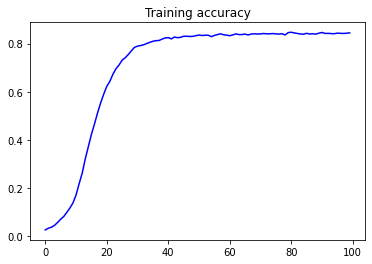

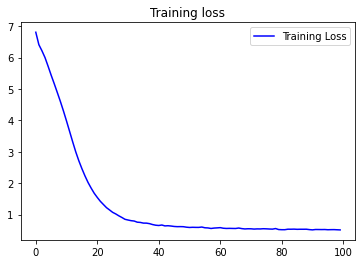

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "in those freckles live their"
next_words = 50 #Play with this quantity to change the number of words you want to see in the output after the seed_text

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predict_x = model.predict(token_list)
  classes_x = np.argmax(predict_x, axis=1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == classes_x:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

in those freckles live their fair will give his gains loving breast shade of you ' in thy jealousy to come place and so belong call not this rhyme abused call with inconstant rhyme bearing it 'no ' shines so bad with mine 'no is with thy granting guest live live in it to dwell
